In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
%cd logs

C:\Users\prath\Documents\Uni(Tudelft)\Bsc_cs\Year_3\AD\TUD-Collaborative-AI-2023_group_18\logs


In [2]:
dir_list = os.listdir("../logs/log_for_trust_comp/")
file_name_for_type =[]
for i in dir_list:
    file_name_for_type.append(("../logs/log_for_trust_comp/"+ i + "/world_1/" + os.listdir("../logs/log_for_trust_comp/"+i+"/world_1")[0]))


In [3]:
dir_list = os.listdir("../logs/our_trust/")
file_name_for_ot =[]
for i in dir_list:
    file_name_for_ot.append("../logs/our_trust/"+i+"/world_1/"+os.listdir("../logs/our_trust/"+i+"/world_1")[0])

In [4]:
def plot_graph_all_differnet_type(filenames, colours=['red', 'green', 'blue', 'black']):
    plt.rcParams['figure.figsize'] = [5,15]
    fig, (ax,ax1,ax2) = plt.subplots(3)
    ax.set_xlabel('Ticks') 
    ax.set_ylabel('Score')
    ax.set_title('Alice')
    ax1.set_xlabel('Ticks') 
    ax1.set_ylabel('Score')
    ax1.set_title('Ben')
    ax2.set_xlabel('Ticks') 
    ax2.set_ylabel('Score')
    ax2.set_title('Charlie')
    
    for i in filenames:
        #read the log file and select the score value
        df = pd.read_csv(i, delimiter=";")
        a= df['score'].to_numpy()
        x=[i for i in range(len(a))]
        
        #check who's run it is and plot accordingly
        name_of_run = i.split("/")[3].split("_")
        if name_of_run[0] == "alice":
            ax.plot(x, a, color=colours[check(name_of_run[-1])], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  
        elif name_of_run[0] == "ben":
            ax1.plot(x, a, color=colours[check(name_of_run[-1])], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  
        else:
            ax2.plot(x, a, color=colours[check(name_of_run[-1])], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  

        
    ax.legend(loc="upper left")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    
    
def check(i:str) ->  int:
    name = i
    if name =='nt':
        return 0
    elif name =='at':
        return 1
    elif name=='rt':
        return 2
    else:
        return 3

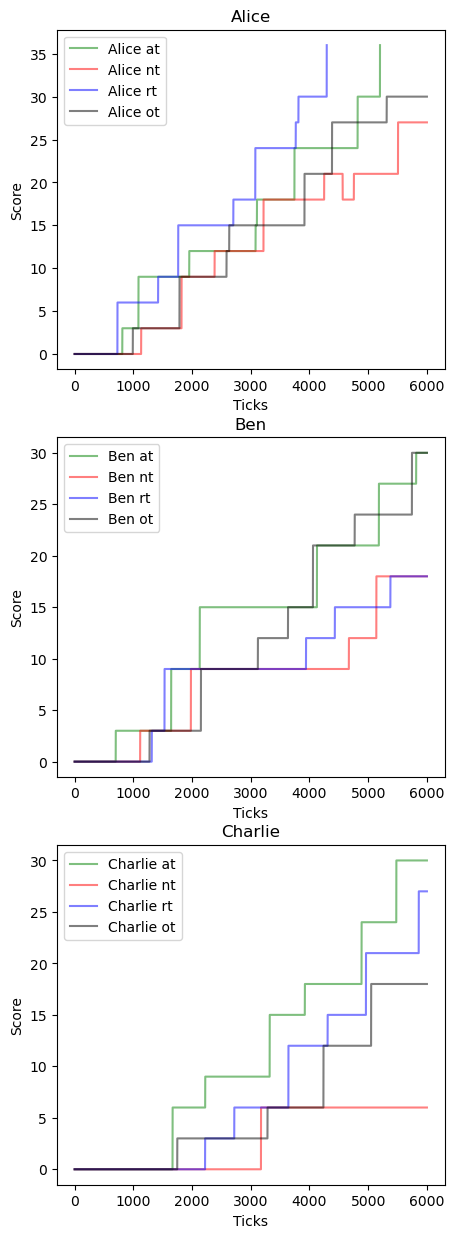

In [5]:
plot_graph_all_differnet_type(file_name_for_type)
plt.savefig("all_data")

In [6]:
def plot_graph_all_our_trust(filenames, title):
    plt.rcParams['figure.figsize'] = [5,15]
    fig, ax = plt.subplots(3)


    for a in range(len(ax)):
        ax[a].set_xlabel('Ticks')
        ax[a].set_ylabel('Score')
        ax[a].set_title(title[a])
        for file in filenames[a * 3:a * 3 + 3]:
            #read the log file and select the score value
            df = pd.read_csv(file, delimiter=";")
            dff= df['score'].to_numpy()
            x=[l for l in range(len(dff))]
            name_of_run =  file.split("/")[3].split("_")
            ax[a].plot(x, dff, alpha=0.5, label = name_of_run[1])

        ax[a].legend(loc="upper left")
    plt.savefig("our")

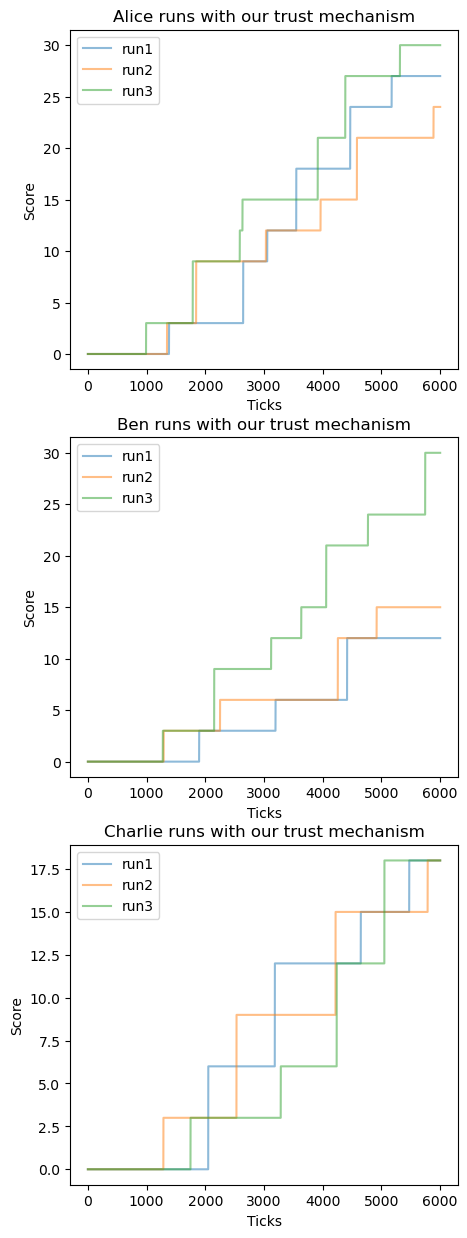

In [8]:
plot_graph_all_our_trust(file_name_for_ot, ["Alice runs with our trust mechanism", "Ben runs with our trust mechanism", "Charlie runs with our trust mechanism"])